In [34]:
import pandas as pd
import glob
import numpy

In [35]:
#import, read and clean data
files  = glob.glob('energy data\\files\*.csv')
all_data = pd.DataFrame()
lis = [];
for f in files:
    df = pd.read_csv(f, skiprows=4)
    df = df.iloc[:,:-1]
    columns = df.columns.values
    for i in range(4,len(columns)):
        columns[i]= 'A'+columns[i]
    
    df.columns = columns
    df = pd.wide_to_long(df, stubnames='A', i =['Country Name', 'Country Code'], j='Year')
    name = df['Indicator Name'][0]
    df = df.rename(columns = {'A':name})
    df = df.drop(columns = ['Indicator Name', 'Indicator Code'])
    lis.append(df)

In [36]:
#merge data
data = pd.concat(lis, axis=1)
data = data.reset_index()

In [37]:
#list of developing and developed countries (taken from Wikipedia)
file_path = 'energy data\\countries.csv'
countries_list = pd.read_csv(file_path, encoding = "ISO-8859-1", header=None)
countries_list.columns = ['code']
countries_list['code']=countries_list['code'].map(lambda x: x.replace(x, x[:3]))

In [38]:
#remove groups of countries like East Asia
data=pd.merge(data,countries_list, left_on='Country Code', right_on='code', how='inner')


In [39]:
data = data.drop(columns='code')


In [40]:
#Introduce category as developing or developed
data['Category'] = 'xxx'


In [41]:
developed_countries = ['Australia', 'Austria', 'Belgium', 'Canada', 'Chile', 'Cyprus', 'Czech Republic', 'Denmark', 'Finland', 'France', 'Germany', 'Greece', 'Iceland', 'Ireland', 'Israel', 'Italy', 'Japan', 'Luxembourg', 'Netherlands', 'New Zealand', 'Norway', 'Poland', 'Portugal', 'Slovenia', 'South Korea', 'Spain', 'Sweden', 'Singapore',  'Switzerland', 'Turkey', 'United Kingdom', 'United States', 'Hong Kong', 'Taiwan', 'Malta', 'Slovakia', 'Estonia', 'Latvia', 'Lithuania']
data['Energy use growth rate(y/y %)'] = data[['Energy use (kg of oil equivalent per capita)']].pct_change()*100


In [42]:
#calculate year/year energy consumption growth rate
check = 0
for i, row in data.iterrows():
    if row['Country Name'] in developed_countries:
        data.at[i, 'Category'] = 'Developed'
    else:
        data.at[i, 'Category'] = 'Developing'
    if check ==1:
        data.at[i,'Energy use growth rate(y/y %)']=numpy.nan
    if numpy.isnan(row['Energy use (kg of oil equivalent per capita)']):
        check=1
    else:
        check =0
    

In [43]:
#change year to numeric
data['Year']=pd.to_numeric(data['Year'])

In [44]:
data2 = data[(data['Country Code']!='CHN') & (data['Country Code']!='IND')]


In [45]:
#dataframe grouped by category and year
df1 = data.groupby(['Category', 'Year']).sum()

In [46]:
df1['Energy use growth rate(y/y %)'] = df1[['Energy use (kg of oil equivalent per capita)']].pct_change()*100
df1 = df1.reset_index()


In [47]:
df1 = df1[df1['Year'].between(2004,2014)]


In [48]:
df2 = data2.groupby(['Category', 'Year']).sum()
df2['Energy use growth rate(y/y %)'] = df2[['Energy use (kg of oil equivalent per capita)']].pct_change()*100
df2 = df2.reset_index()
df2 = df2[df2['Year'].between(2004,2014)]
for i, row in df2.iterrows():
    if row['Category'] == 'Developed':
        df2.at[i, 'Energy use (kg of oil equivalent per capita)'] = df2.at[i, 'Energy use (kg of oil equivalent per capita)']/35
    else:
        df2.at[i, 'Energy use (kg of oil equivalent per capita)'] = df2.at[i, 'Energy use (kg of oil equivalent per capita)']/215

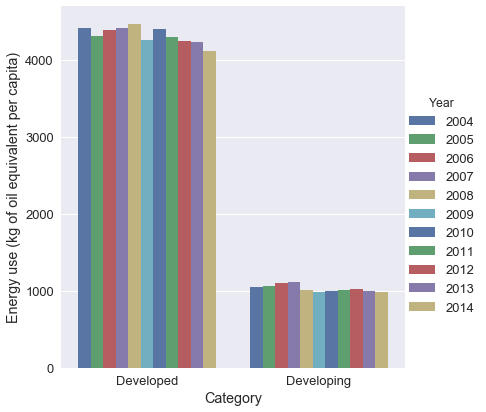

In [50]:
import seaborn as sns
%matplotlib inline
sns.set(font_scale=1.3)
sns.factorplot(x='Category', y='Energy use (kg of oil equivalent per capita)', hue='Year', kind='bar', 
               data=df2,size=6, palette='deep')

In [54]:
data3 = data[data['Year'].between(2007,2017)]
data3 = data3[(data3['Year']==2007) | (data3['Year']==2017)]
data3['GDP growth in 10 years (%)'] = ((data3[['GDP (current US$)']].pct_change()+1)**(1/10)-1)*100

In [55]:
data3 = data3[(data3['Year']==2017)]
data3 = data3[numpy.isfinite(data3['GDP growth in 10 years (%)'])]
data4=data3[(data3['Country Code'] != 'USA')]

(array([-2.0e+12,  0.0e+00,  2.0e+12,  4.0e+12,  6.0e+12,  8.0e+12,
         1.0e+13,  1.2e+13,  1.4e+13]), <a list of 9 Text yticklabel objects>)

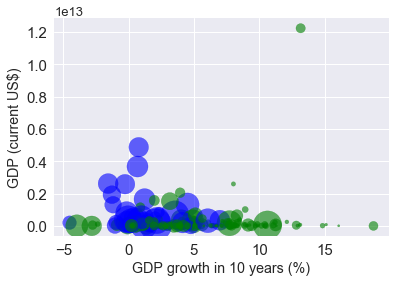

In [56]:
plt.figure(figsize=(50,20))
data4.plot.scatter(x='GDP growth in 10 years (%)', y='GDP (current US$)', 
                  s=data4['GDP per capita (current US$)']*.01, alpha=0.6, c=colors)

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)